In [1]:
import pandas as pd 
import numpy as np 
import csv
from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
!python3 --version

Python 3.8.5


In [11]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.0.0
affine                             2.3.0
aiohttp                            3.8.1
aiosignal                          1.2.0
alabaster                          0.7.12
ale-py                             0.7.3
anaconda-client                    1.9.0
anaconda-navigator                 2.1.0
anaconda-project                   0.10.2
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              1.2.1
asgiref                            3.5.0
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0
astunparse                         1.6.

Note: you may need to restart the kernel to use updated packages.


In [2]:
comments = pd.read_csv('/Users/mao_shiba/Desktop/Uchicago/COURSES/2021-Content-Analysis/Movie_Comments/moviedata-10m/moviedata-10m/comments.csv')
comments.columns

Index(['COMMENT_ID', 'USER_MD5', 'MOVIE_ID', 'CONTENT', 'VOTES',
       'COMMENT_TIME', 'RATING'],
      dtype='object')

In [3]:
comments = comments.loc[:, ['COMMENT_TIME','COMMENT_ID','MOVIE_ID', 'USER_MD5','CONTENT', 'VOTES', 'RATING']]
comments = comments.rename(columns={'COMMENT_ID':'comment_id',
                                    'COMMENT_TIME':'comment_time',
                                    'MOVIE_ID':'movie_id',
                                    'RATING':'rating',
                                    'CONTENT':'content',
                                   'USER_MD5':'user_md5',
                                   'VOTES':'votes'})
comments.head(100)

,comment_time,comment_id,movie_id,user_md5,content,votes,rating
0,2018-09-05 19:42:07,1359352573,5113101,0ab7e3efacd56983f16503572d2b9915,480p，画质不高，黑白，y,0,2.0
1,2019-07-09 14:52:07,1598245094,5113101,84dfd3f91dd85ea105bc74a4f0d7a067,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,0,1.0
2,2010-11-05 22:15:44,311937819,3718526,c9a47fd59b55967ceac07cac6d5f270c,上吊那裡超好笑，可惜最後報告近況的旁白大扣分,0,3.0
3,2010-06-20 02:12:50,262536568,3718526,35d3d5a52a7515c2ca6bb4d8e965149b,上海国际电影节观摩片,0,NaN
4,2011-04-09 22:10:13,376372407,3718526,54bfe88b57d8a3caea2637e62d182cf7,！,0,NaN
...,...,...,...,...,...,...,...
95,2011-05-02 18:37:04,375203732,4824996,5876636b6eb3c3b4c871735f42251f77,初恋的故事很有爱啊啊啊啊啊啊,0,5.0
96,2012-06-11 18:13:43,543006717,4824996,472613a6fe5e656ff91fc919f942387a,笑死了！,1,5.0
97,2013-05-29 00:04:13,686077771,10514820,092891f982868bae4cde8640a0c20c91,怎么打不开,0,5.0
98,2012-05-23 13:42:17,535338434,10514820,99c3d75c595734665f30bb09426d0ee9,小的时候完全不爱看，太暴力，太黑社会了,1,3.0


In [91]:
comments[comments['rating']==5.0].head(30)

,comment_time,comment_id,movie_id,user_md5,content,votes,rating
10,2012-07-25 22:03:32,560603476,4824996,c98155000a3420758910ac19414b7118,全职主妇侦探，不，是强盗。,1,5.0
11,2011-01-26 17:18:50,345508641,4824996,bd3ba3fc3a4f3c925ef3dfe1b8ecec38,哈哈哈哈哈哈哈！师父果然威武！,0,5.0
18,2011-05-31 02:40:45,397264579,4824996,1ab2413c7fc9c8dded02b4639a9b185b,这个好玩,0,5.0
19,2010-07-11 12:09:08,269452462,4824996,05305f812f7fb658be6543f5f7867e7c,哈哈哈哈哈好带喜感的师傅~~,0,5.0
20,2010-07-03 13:20:46,266767555,4824996,f70064710785fe85f4248a76343b8fbf,从小就这臭脾气,0,5.0
21,2011-07-01 17:28:36,409235560,4824996,1d0010c5c5690b5ed9c94b1c5bf483ac,小姐，你的熊掉了。,0,5.0
23,2010-05-08 21:04:38,248788917,4824996,c7977c97baf4508029fa9279a0d5a7a8,主妇很威武！,0,5.0
29,2010-10-30 11:13:32,309605771,4824996,7f1a11e321a4c243aba4a75ced02ed96,小姐，你的熊掉了.\n,0,5.0
30,2010-05-08 12:24:58,248606500,4824996,6bc5e44fef84ceca6167a9ada2ec70e6,小姐你的熊掉了……神啊……,0,5.0
32,2012-08-18 00:59:45,569512117,4824996,f075873af737b8d33d1617be2048b6af,几个sp中最好看的,0,5.0


In [90]:
comments[comments['rating']==3.0].head(30)

,comment_time,comment_id,movie_id,user_md5,content,votes,rating
2,2010-11-05 22:15:44,311937819,3718526,c9a47fd59b55967ceac07cac6d5f270c,上吊那裡超好笑，可惜最後報告近況的旁白大扣分,0,3.0
7,2014-04-19 01:30:48,798211658,10514820,86dd268419a02513163814b3650e4cac,连这个竟然都看了...,1,3.0
8,2012-09-22 12:52:36,582827065,10514820,93ce30280bf1b116041a721906a2f64f,我不知道那时候为什么看了这么多香港口水片……,5,3.0
17,2014-08-23 11:03:09,839010140,10514820,61c3fef0c1734144b70a66a761706a0a,原来你咬我啊这个段子，是在这本电影里出现的呀。,2,3.0
36,2014-07-21 19:54:38,827905315,10514820,796130da487ee02320f820d5ffc1be89,小时候的陈浩南，山鸡，包皮，大飞，乌鸦，坤哥。,0,3.0
37,2017-02-25 02:13:23,1157018123,10514820,b6a1d2c38c19ffc70ab5abe474a44c5c,喜欢老港剧中的美女和帅哥,0,3.0
38,2019-02-27 23:53:34,1696382651,10514820,c207e44fcc36dfbb8f29330e3244801d,以前超级喜欢跟弟弟一起看😂😂,0,3.0
39,2013-08-30 10:53:40,721183432,10514820,c37de57379adf5916291472098d06745,~~~,0,3.0
51,2013-02-04 18:36:32,639162395,20433357,daca7151851336a87b50335d754ede0a,——这么说，你一定要等她了？\n——嗯\n——有多坚定？\n——像你对我那样。,6,3.0
52,2012-12-28 16:03:29,622031524,20433357,15ab8109860b1c178fdafbe76523c60a,男女猪脚演技还可以再假一点，虽然我很萌这种剧情的电影，但是实在了。拍摄效果倒还可以。,3,3.0


### Check duplication

We use comment id to check duplication

In [5]:
len(set(comments['comment_id'])) == len(comments)

True

### Check  empty comments 

In [4]:
# check empty content
empty_lst = []
error_lst = []
for index, row in tqdm(comments.iterrows()):
    try:
        if not row['content'].strip():
            empty_lst.append(index)
    except AttributeError:
        error_lst.append(index)

4428475it [03:06, 23777.58it/s]


In [5]:
empty_lst, error_lst

([190275,
  214925,
  396835,
  1537748,
  1922925,
  2146103,
  2583066,
  3101326,
  3770463],
 [2065335, 2875690])

In [6]:
comments.drop(empty_lst + error_lst, axis=0, inplace=True)
comments = comments.reset_index(drop=True)
comments

,comment_time,comment_id,movie_id,user_md5,content,votes,rating
0,2018-09-05 19:42:07,1359352573,5113101,0ab7e3efacd56983f16503572d2b9915,480p，画质不高，黑白，y,0,2.0
1,2019-07-09 14:52:07,1598245094,5113101,84dfd3f91dd85ea105bc74a4f0d7a067,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,0,1.0
2,2010-11-05 22:15:44,311937819,3718526,c9a47fd59b55967ceac07cac6d5f270c,上吊那裡超好笑，可惜最後報告近況的旁白大扣分,0,3.0
3,2010-06-20 02:12:50,262536568,3718526,35d3d5a52a7515c2ca6bb4d8e965149b,上海国际电影节观摩片,0,NaN
4,2011-04-09 22:10:13,376372407,3718526,54bfe88b57d8a3caea2637e62d182cf7,！,0,NaN
...,...,...,...,...,...,...,...
4428459,2018-07-08 17:48:09,1402192514,26914297,517cd1ba10c6bf42465184808ec80c1f,歌舞精良，但是故事情节看的真是闹心。在时代的大背景下，谁都无法独善其身。,0,5.0
4428460,2017-01-03 17:55:35,1131394883,26914297,9b03a9f6953b06611e3352a889ecdfa2,麦金托什的25周年全部是视觉路线,0,4.0
4428461,2018-12-10 20:09:20,1565118781,26914297,4f696ad30cec6601ca49dfc2281985f3,记不住里面任何一首歌，就觉得胖女孩的胳膊记忆犹新,0,3.0
4428462,2019-08-03 14:39:02,1888955067,26914297,9b32c4b5f73092083e23669ea6731b86,故事不喜欢，但是场景精致，唱段好听。,0,4.0


In [7]:
comments['comment_time'] = pd.to_datetime(comments['comment_time'])
comments = comments.set_index('comment_time').sort_index()
comments_count = comments['content'].groupby(comments.index.year).count().tolist()                     
comments_count

[1603,
 13596,
 34985,
 92789,
 142996,
 261817,
 355512,
 377018,
 312147,
 270202,
 268842,
 344790,
 453415,
 563922,
 934830]

In [19]:
comments_count_df = pd.DataFrame(comments['content'].groupby(comments.index.year).count(), columns=['content'])  

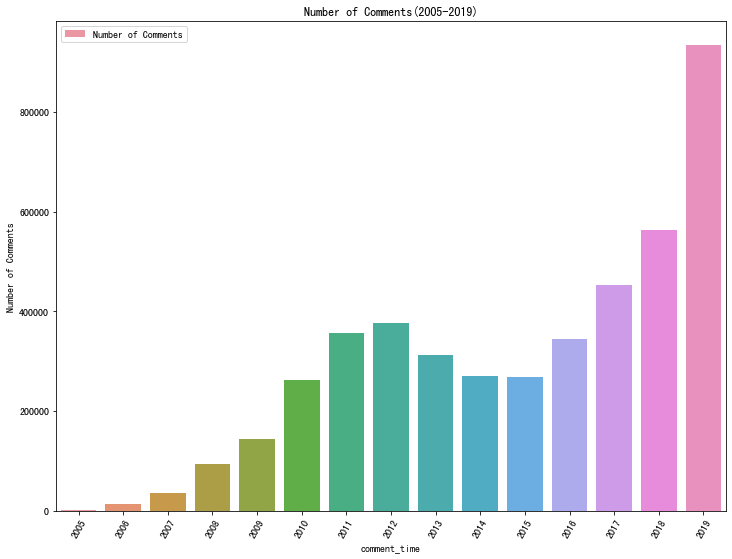

In [20]:
# plot number of comments by year
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.barplot(data = comments_count_df,
            x = comments_count_df.index,
            y = 'content',
            ax=ax,
            label='Number of Comments'
            ).set_title("Number of Comments(2005-2019)")
plt.xticks(rotation=60)
plt.ylabel('Number of Comments')
plt.legend(loc = 'upper left');

### Get some statistics

In [8]:
def get_rating_by_year(comments, comments_count):
    
    cur = 0
    year = 2005
    dic = {}
    total_users_dic = {}
    for year_num in comments_count:
        rating_1 = 0
        rating_2 = 0
        rating_3 = 0
        rating_4 = 0
        rating_5 = 0
        rating_nan = 0
        
        # comments with ratings 
        score_lst = []
        users_dic = {}
        for x, md5 in tqdm(zip(comments.iloc[cur: cur + year_num]['rating'], 
                          comments.iloc[cur: cur + year_num]['user_md5'])):
            # users_info in one year
            if md5 not in users_dic:
                users_dic[md5] = 0
            users_dic[md5] += 1
            
            # all users_info
            if md5 not in total_users_dic:
                total_users_dic[md5] = 0
            total_users_dic[md5] += 1
            
            
            if x in set((1.0,)):
                rating_1 += 1
                score_lst.append(x)
            elif x in set((2.0,)):
                rating_2 += 1
                score_lst.append(x)
            elif x in set((3.0,)):
                rating_3 += 1
                score_lst.append(x)
            elif x in set((4.0,)):
                rating_4 += 1
                score_lst.append(x)
            elif x in set((5.0,)):
                rating_5 += 1
                score_lst.append(x)
            else:
                rating_nan += 1
        
        # cal proportion
        portion_1 = rating_1/year_num
        portion_2 = rating_2/year_num
        portion_3 = rating_3/year_num
        portion_4 = rating_4/year_num
        portion_5 = rating_5/year_num
        portion_nan = rating_nan/year_num
        
        # cal mean and std of ratings
        rating_mean = np.array(score_lst).mean()
        rating_std = np.array(score_lst).std()
        
        # user stats
        user_num = len(users_dic.values())
        user_avg_comments = np.array(list(users_dic.values())).mean()
        user_std_comments = np.array(list(users_dic.values())).std()
        
        dic[year] = [rating_1, rating_2, rating_3, rating_4, rating_5, rating_nan,
                    portion_1, portion_2, portion_3, portion_4, portion_5, portion_nan,
                    rating_mean, rating_std, user_num, user_avg_comments, user_std_comments]
        cur += year_num
        year += 1
    return dic, total_users_dic

In [9]:
dic, user_dic = get_rating_by_year(comments, comments_count)

1603it [00:00, 528533.08it/s]
13596it [00:00, 496169.54it/s]
34985it [00:00, 452425.03it/s]
92789it [00:00, 464874.24it/s]
142996it [00:00, 492496.95it/s]
261817it [00:00, 493840.64it/s]
355512it [00:00, 499796.18it/s]
377018it [00:00, 465628.69it/s]
312147it [00:00, 464324.29it/s]
270202it [00:00, 461559.43it/s]
268842it [00:00, 427177.50it/s]
344790it [00:00, 458399.76it/s]
453415it [00:00, 474511.35it/s]
563922it [00:01, 452451.58it/s]
934830it [00:02, 455498.67it/s]


In [10]:
s = 0
for v in dic.values():
    s += sum(v[:6])
s

4428464

In [11]:
sum(comments_count)

4428464

In [12]:
df = pd.DataFrame(dic, index = ['rating=1.0','rating=2.0', 'rating=3.0', 'rating=4.0', 'rating=5.0', 'rating=NaN',
                               'portion_1.0','portion_2.0', 'portion_3.0', 'portion_4.0', 'portion_5.0', 'portion_NaN',
                               'rating_mean', 'rating_std', 'user_num', 'user_avg_comments', 'user_std_comments'])
x = df.columns
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
rating=1.0,53.000000,389.000000,1160.000000,3328.000000,6129.000000,12077.000000,20003.000000,23030.000000,24485.000000,24250.000000,25781.000000,32965.000000,40558.000000,50546.000000,53433.000000
rating=2.0,104.000000,1084.000000,2915.000000,8476.000000,14236.000000,26927.000000,39238.000000,43616.000000,39546.000000,35299.000000,37305.000000,46781.000000,61730.000000,75644.000000,96324.000000
rating=3.0,386.000000,3598.000000,9723.000000,27719.000000,44141.000000,82005.000000,114238.000000,123536.000000,101548.000000,87241.000000,88066.000000,111189.000000,145482.000000,180134.000000,283885.000000
rating=4.0,502.000000,4296.000000,10809.000000,28878.000000,44494.000000,82146.000000,108721.000000,110936.000000,84929.000000,70643.000000,67822.000000,89832.000000,121597.000000,151439.000000,298393.000000
rating=5.0,369.000000,2926.000000,6287.000000,15961.000000,22913.000000,40933.000000,50429.000000,49848.000000,40007.000000,34477.000000,32399.000000,44065.000000,59336.000000,74612.000000,166397.000000
rating=NaN,189.000000,1303.000000,4091.000000,8427.000000,11083.000000,17729.000000,22883.000000,26052.000000,21632.000000,18292.000000,17469.000000,19958.000000,24712.000000,31547.000000,36398.000000
portion_1.0,0.033063,0.028611,0.033157,0.035866,0.042861,0.046128,0.056265,0.061085,0.078441,0.089748,0.095896,0.095609,0.089450,0.089633,0.057158
portion_2.0,0.064878,0.079729,0.083321,0.091347,0.099555,0.102847,0.110370,0.115687,0.126690,0.130639,0.138762,0.135680,0.136145,0.134139,0.103039
portion_3.0,0.240799,0.264637,0.277919,0.298732,0.308687,0.313215,0.321334,0.327666,0.325321,0.322873,0.327575,0.322483,0.320858,0.319431,0.303676
portion_4.0,0.313163,0.315975,0.308961,0.311222,0.311156,0.313753,0.305815,0.294246,0.272080,0.261445,0.252275,0.260541,0.268180,0.268546,0.319195


In [13]:
comments

,comment_id,movie_id,user_md5,content,votes,rating
comment_time,,,,,,
2005-06-12 02:22:07,3942,1291856,4d69f002306f819034976e3818a84908,http://www.bighead.cn/?p=15,19,4.0
2005-06-12 02:22:07,3944,1291581,4d69f002306f819034976e3818a84908,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,6,4.0
2005-06-12 02:22:07,3943,1291832,4d69f002306f819034976e3818a84908,我爱特拉沃塔的舞。,1590,5.0
2005-06-12 02:22:07,3945,1291582,4d69f002306f819034976e3818a84908,20061118跟小白重看了一遍。,0,5.0
2005-06-12 02:22:09,4104,1292210,6c0f657ba0d8600e45f323e65a8de516,重看依然很喜欢很喜欢,0,4.0
...,...,...,...,...,...,...
2019-09-07 15:57:07,1942942072,27063867,79a5045cc0cce798c046b84a56578d6d,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,0,2.0
2019-09-07 15:58:03,1942943180,27063867,fed2dab59d6797ad2c3838091a1288b8,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,0,2.0
2019-09-07 15:58:51,1942944164,27063867,32b9368b0d6edac78eed1049434f765b,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,0,2.0


In [14]:
year_info = {'year':comments.index.year}
comments['year'] = year_info['year']
comments

,comment_id,movie_id,user_md5,content,votes,rating,year
comment_time,,,,,,,
2005-06-12 02:22:07,3942,1291856,4d69f002306f819034976e3818a84908,http://www.bighead.cn/?p=15,19,4.0,2005
2005-06-12 02:22:07,3944,1291581,4d69f002306f819034976e3818a84908,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,6,4.0,2005
2005-06-12 02:22:07,3943,1291832,4d69f002306f819034976e3818a84908,我爱特拉沃塔的舞。,1590,5.0,2005
2005-06-12 02:22:07,3945,1291582,4d69f002306f819034976e3818a84908,20061118跟小白重看了一遍。,0,5.0,2005
2005-06-12 02:22:09,4104,1292210,6c0f657ba0d8600e45f323e65a8de516,重看依然很喜欢很喜欢,0,4.0,2005
...,...,...,...,...,...,...,...
2019-09-07 15:57:07,1942942072,27063867,79a5045cc0cce798c046b84a56578d6d,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,0,2.0,2019
2019-09-07 15:58:03,1942943180,27063867,fed2dab59d6797ad2c3838091a1288b8,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,0,2.0,2019
2019-09-07 15:58:51,1942944164,27063867,32b9368b0d6edac78eed1049434f765b,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,0,2.0,2019


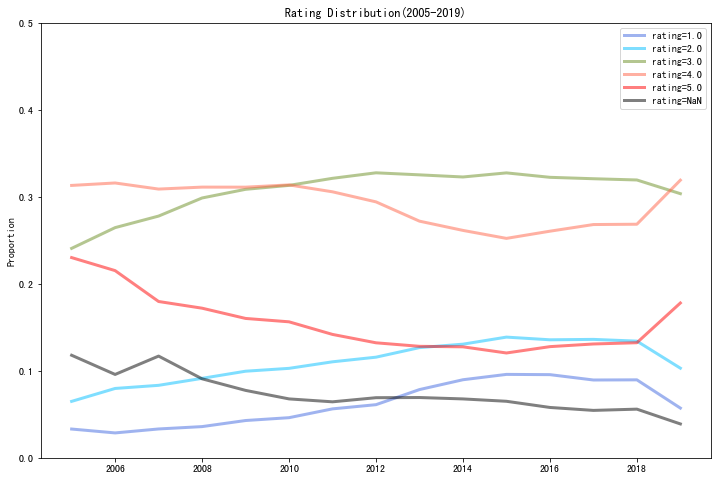

In [73]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, 
        df.loc['portion_1.0', :],
        c='royalblue', 
        linewidth=3,
        alpha=0.5,
        label='rating=1.0')

ax.plot(x, 
        df.loc['portion_2.0', :],
        c='deepskyblue', 
        linewidth=3,
        alpha=0.5,
        label='rating=2.0')

ax.plot(x, 
        df.loc['portion_3.0', :],
        linewidth=3,
        alpha=0.5,
        color='olivedrab', label='rating=3.0')

ax.plot(x, 
        df.loc['portion_4.0', :],
        linewidth=3,
        alpha=0.5,
        color='tomato', label='rating=4.0')

ax.plot(x, 
        df.loc['portion_5.0', :],
        linewidth=3,
        alpha=0.5,
        color='red', 
        label='rating=5.0')

ax.plot(x, 
        df.loc['portion_NaN', :],
        linewidth=3,
        alpha=0.5,
        color='k', label='rating=NaN')

plt.title("Rating Distribution(2005-2019)")
plt.ylabel('Proportion')
plt.ylim([0, 0.5])
plt.legend(loc = 'upper right')
plt.savefig('results/rating_distribution_2005_2019.png')

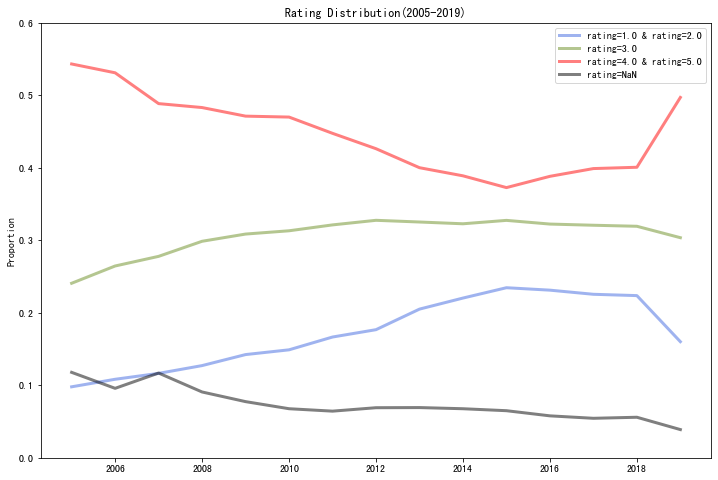

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, 
        df.loc['portion_1.0', :] + df.loc['portion_2.0', :],
        c='royalblue', 
        linewidth=3,
        alpha=0.5,
        label='rating=1.0 & rating=2.0')

ax.plot(x, 
        df.loc['portion_3.0', :],
        linewidth=3,
        alpha=0.5,
        color='olivedrab', 
        label='rating=3.0')

ax.plot(x, 
        df.loc['portion_4.0', :] + df.loc['portion_5.0', :],
        linewidth=3,
        alpha=0.5,
        color='red', 
        label='rating=4.0 & rating=5.0')

ax.plot(x, df.loc['portion_NaN', :],
        linewidth=3,
        alpha=0.5,
        color='k', label='rating=NaN')

plt.title("Rating Distribution(2005-2019)")
plt.ylabel('Proportion')
plt.ylim([0, 0.6])
plt.legend(loc = 'upper right')
plt.savefig('results/rating_distribution_2005_2019_2.png')

In [15]:
comments_plt = comments.reset_index()

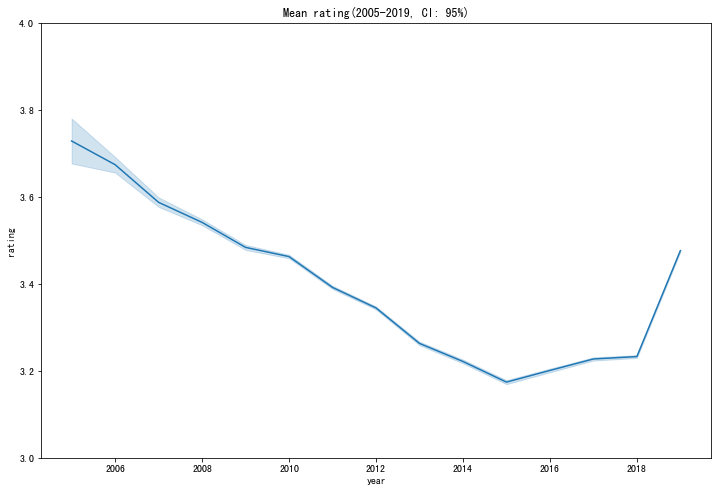

In [16]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(x="year",y="rating",
             data=comments_plt[comments_plt['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])],
             ci=95).set_title("Mean rating(2005-2019, CI: 95%)")
ax.set_yticks([3.0, 3.2, 3.4, 3.6, 3.8, 4.0]);
plt.savefig('results/mean_rating_2005_2019.png')

In [17]:
# y_mean = df.loc['rating_mean', :]
# y_std = df.loc['rating_std', :]
# lower = y_mean - y_std
# upper = y_mean + y_std

# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(x, y_mean, color='tab:blue', linewidth=2)
# ax.plot(x, lower, color='tab:blue', alpha=0.1)
# ax.plot(x, upper, color='tab:blue', alpha=0.1)
# ax.fill_between(x, lower, upper, alpha=0.2)

# plt.title("Mean and Variance of Rating(2005-2019)")
# plt.ylabel('Rating')
# plt.xlabel('Year')

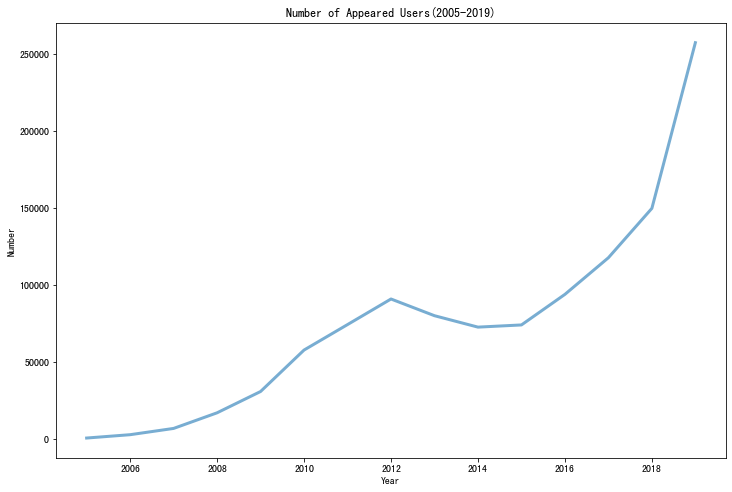

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, df.loc['user_num', :], label='active users', linewidth=3, alpha=0.6)
plt.title("Number of Appeared Users(2005-2019)")
plt.ylabel('Number')
plt.xlabel('Year')
# plt.legend(loc = 'upper left')
plt.savefig('results/appeared_users_2005_2019.png')

In [21]:
# y_mean = df.loc['user_avg_comments', :]
# y_std = df.loc['user_std_comments', :]
# lower = y_mean - y_std
# upper = y_mean + y_std

# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(x, y_mean, color='tab:blue')
# ax.plot(x, lower, color='tab:blue', alpha=0.1)
# ax.plot(x, upper, color='tab:blue', alpha=0.1)
# ax.fill_between(x, lower, upper, alpha=0.2)

# plt.title("Mean and Variance of number of comments per user(2005-2019)")
# plt.ylabel('Number of comments')
# plt.xlabel('Year')

### Example of a popular film

In [96]:
# 1295644
df_shawshank = comments[comments['movie_id'] == 1292052]
df_shawshank['comment_time'] = pd.to_datetime(df_shawshank['comment_time'])
df_shawshank = df_shawshank.set_index('comment_time').sort_index()
df_shawshank

/var/folders/c3/t518_j_930s_7b9x8rb4jr3w0000gn/T/ipykernel_69899/4048411562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shawshank['comment_time'] = pd.to_datetime(df_shawshank['comment_time'])


,comment_id,movie_id,user_md5,content,votes,rating
comment_time,,,,,,
2005-10-08 14:35:04,380050,1292052,626b472cc3b4cf94a14e038ce60b9eaf,因为1994年台湾引进了一部比较卖座的老片The Sting，被错译成了《刺激》。到了199...,446,5.0
2005-10-28 00:28:07,477351,1292052,c9e6c051ef51dd1d3c96ca9bfe8d3c79,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,13378,5.0
2005-12-26 22:57:17,906193,1292052,fa57b9d0a060f70b7e88cf46e3593488,不多说了,253,5.0
2006-01-02 23:57:15,980059,1292052,e0036d3d3989267b755d53961d0547bb,"超级喜欢超级喜欢,不看的话人生不圆满.",4256,5.0
2006-02-04 05:58:22,142054,1292052,87d1bb2fb7653a07aa21ba73c0696d21,"Fear Can Hold You Prisoner, Hope Can Set You Free",1937,5.0
...,...,...,...,...,...,...
2019-09-06 20:36:37,1941968199,1292052,69eab12969ff8b9ae91c1c29cf4c335f,怒吼吧。不争的事实，哈哈,0,5.0
2019-09-06 20:38:03,1941969515,1292052,8d5bbc53a5d3a1e6753fbea21f95f0e4,也就十几遍吧,0,5.0
2019-09-06 20:38:51,1941970333,1292052,b1fe1e07da4431fa19cabf65d7e56408,生命的规训,0,5.0


In [97]:
shawshank_count_df = pd.DataFrame(df_shawshank['content'].groupby(df_shawshank.index.year).count())
shawshank_count_df

,content
comment_time,
2005,3
2006,10
2007,5
2008,11
2009,12
2010,10
2011,3
2012,10
2013,4


We can find that the selection of the 320 comments are not purly based on the number of upvotes. If that's is the case, then new comments will never be upvoted and gain attention. Hence, there must be an algorithm that select some new comments and increase their ranks.

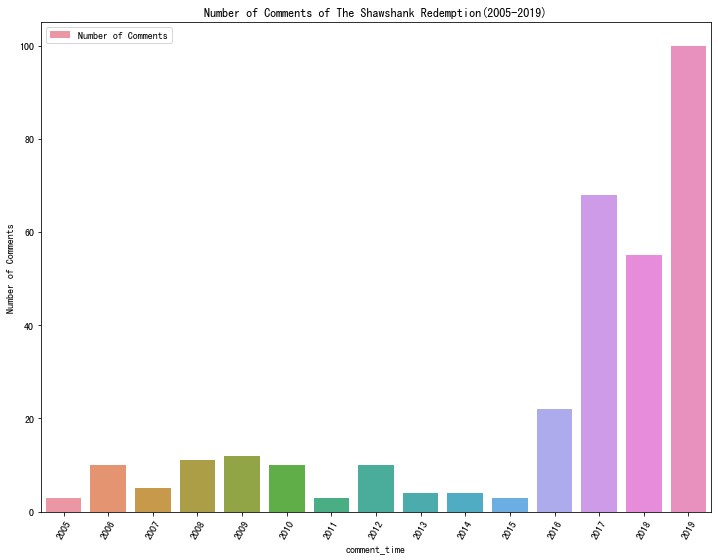

In [33]:
# plot number of comments by year
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.barplot(data = shawshank_count_df,
            x = shawshank_count_df.index,
            y = 'content',
            ax=ax,
            label='Number of Comments'
            ).set_title("Number of Comments of The Shawshank Redemption(2005-2019)")
plt.xticks(rotation=60)
plt.ylabel('Number of Comments')
plt.legend(loc = 'upper left');

### Get finer-granularity user-level analysis

Distribution of users in using number of comments as activity level. 

In [85]:
!pip install tabulate
from tabulate import tabulate

In [22]:
user_dic

{'4d69f002306f819034976e3818a84908': 320,
 '6c0f657ba0d8600e45f323e65a8de516': 30,
 '17739145eb2c9f82586e72225de046a3': 62,
 '1d9b086e351695cf6e524d7fef051a13': 7,
 '037bf77a6b61d5e125ffa025d77bb0ad': 1,
 '4d13992cd8f8a807516eef1d6b849695': 1,
 'cc1a3f86b1193f9bb89179ce786a907c': 2,
 '4c71e26157aabe84bdff1a4548c9d696': 20,
 '88ade831007b8f94deb739d335f4a5d0': 95,
 '6e8a7940a8a008cefa3b34dedeeaa5d6': 162,
 '730ba737fef28a9810633dafee3e97b7': 14,
 '16357c4a27c3104965581293a870b04f': 1,
 'f6842a34cfb5abf13ddff80eb0d38ea7': 5,
 '39646ac31fc345137f383a6da6cd4f4e': 45,
 '3c3161241302d387cbb5e257212ad16f': 33,
 'a2deef4389af41cc62db8ad5d2fa2a45': 210,
 '016170bd2f1019c04addbd8837c4af13': 125,
 'af96acbcd3322965da3f74d40339cb3b': 107,
 'c203a2d339f2fa0f269ad2ad9617989f': 1,
 'eab6ace6ea7d116159c174dea1ad47b6': 38,
 '8069c5d14a4d6be6ad9e20be3f6597c4': 4,
 '322e6cb4f47534c23b607d817de1bdd9': 3,
 '3dc9d11ca04a0438dbd226b489d75b47': 8,
 'b6552e5f05d14615477b61ab6705d84f': 1,
 '757d8dd209f859e9b195

In [36]:
# number of users for different number of comments
Counter(user_dic.values())

Counter({320: 6,
         30: 793,
         62: 178,
         7: 11157,
         1: 334357,
         2: 94312,
         20: 1758,
         95: 85,
         162: 38,
         14: 3261,
         5: 20445,
         45: 351,
         33: 647,
         210: 21,
         125: 62,
         107: 68,
         38: 528,
         4: 29952,
         3: 47982,
         8: 8816,
         15: 2925,
         66: 176,
         13: 3682,
         26: 1031,
         43: 372,
         22: 1343,
         218: 15,
         41: 435,
         19: 1857,
         102: 72,
         239: 9,
         112: 61,
         717: 2,
         12: 4292,
         1587: 1,
         10: 6038,
         28: 888,
         418: 4,
         662: 2,
         11: 5009,
         16: 2670,
         677: 2,
         32: 738,
         39: 452,
         54: 262,
         145: 26,
         17: 2329,
         6: 14748,
         131: 33,
         122: 56,
         183: 16,
         155: 38,
         172: 23,
         52: 307,
         75: 12

In [37]:
# different number of comments 
len(list(Counter(user_dic.values()).keys()))

915

Here we define users having more than average number of comments appeared in our dataset as active users. 

Note:since this dataset is incompelete, those defined as less active users could also be active. Hence the agverage number of comments for users are underestimated. 

In [23]:
"%i users"%len(user_dic.keys())

'638961 users'

In [24]:
"%i comments"%sum(user_dic.values())

'4428464 comments'

In [25]:
"%.3f comments per user"%(sum(user_dic.values())/len(user_dic.keys()))

'6.931 comments per user'

In [83]:
comments_from_active_users = 0
count_active_user = 0
for v in user_dic.values():
    if v >= 7:
        count_active_user +=1
        comments_from_active_users += v
print('%i active users'%count_active_user)
print('%i comments from active users'%comments_from_active_users)

97165 active users
3451016 comments from active users


In [87]:
user_comment_dic = {'users':[len(user_dic.keys()) - count_active_user, count_active_user],
                   'comments':[sum(user_dic.values())-comments_from_active_users, comments_from_active_users]}

In [93]:
pd.DataFrame(user_comment_dic, index=['not active users', 'active users'])

,users,comments
not active users,541796,977448
active users,97165,3451016


In [27]:
is_active = []
for idx, row in tqdm(comments.iterrows()):
    if user_dic[row['user_md5']] >= 7: 
        is_active.append('active')
    elif user_dic[row['user_md5']] == 1:
        is_active.append('least active')
    else:
        is_active.append('less active')

4428464it [03:27, 21388.44it/s]


In [30]:
# user_info = pd.DataFrame({'active_state':is_active, 'year':comments.index.year}, index=comments.index)
user_info = pd.DataFrame({'active_state':is_active}, index=comments.index)

In [31]:
comments_user = pd.concat([comments, user_info], axis=1)
comments_user

,comment_id,movie_id,user_md5,content,votes,rating,year,active_state
comment_time,,,,,,,,
2005-06-12 02:22:07,3942,1291856,4d69f002306f819034976e3818a84908,http://www.bighead.cn/?p=15,19,4.0,2005,active
2005-06-12 02:22:07,3944,1291581,4d69f002306f819034976e3818a84908,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,6,4.0,2005,active
2005-06-12 02:22:07,3943,1291832,4d69f002306f819034976e3818a84908,我爱特拉沃塔的舞。,1590,5.0,2005,active
2005-06-12 02:22:07,3945,1291582,4d69f002306f819034976e3818a84908,20061118跟小白重看了一遍。,0,5.0,2005,active
2005-06-12 02:22:09,4104,1292210,6c0f657ba0d8600e45f323e65a8de516,重看依然很喜欢很喜欢,0,4.0,2005,active
...,...,...,...,...,...,...,...,...
2019-09-07 15:57:07,1942942072,27063867,79a5045cc0cce798c046b84a56578d6d,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,0,2.0,2019,active
2019-09-07 15:58:03,1942943180,27063867,fed2dab59d6797ad2c3838091a1288b8,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,0,2.0,2019,active
2019-09-07 15:58:51,1942944164,27063867,32b9368b0d6edac78eed1049434f765b,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,0,2.0,2019,active


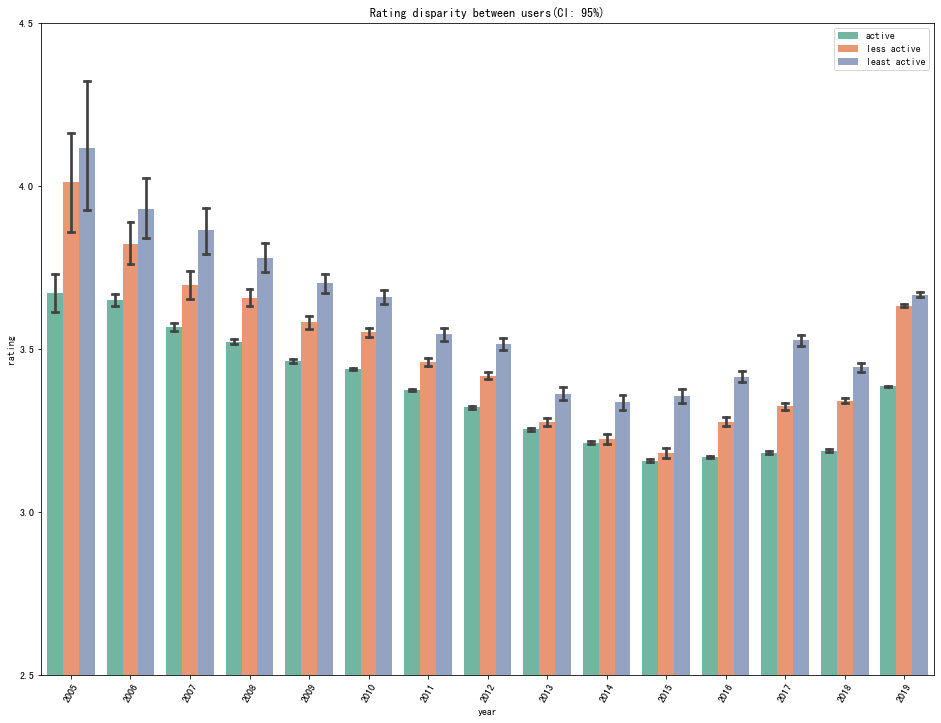

In [42]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.barplot(x="year",y="rating",
            data=comments_user[comments_user['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])],
            hue="active_state",
            hue_order=['active', 'less active', 'least active'],
            ci=95,
            capsize=.1,
            palette="Set2").set_title("Rating disparity between users(CI: 95%)")
ax.set_yticks([2.5, 3.0, 3.5, 4.0, 4.5]);
plt.ylim([2.5, 4.5])
plt.xticks(rotation=60);
plt.legend(loc = 'upper right');
plt.savefig('results/rating_disparity_2005_2019.png')

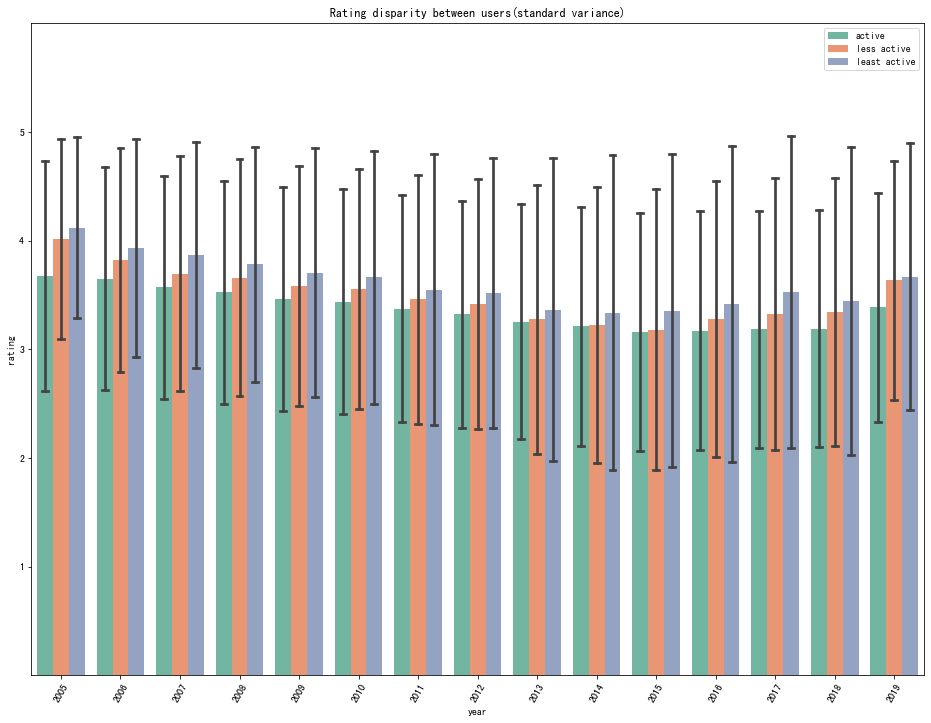

In [101]:
# using standard variance
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.barplot(x="year",y="rating",
            data=comments_user[comments_user['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])],
            hue="active_state",
            hue_order=['active', 'less active', 'least active'],
            ci='sd',
            capsize=.1,
            palette="Set2").set_title("Rating disparity between users(standard variance)")
ax.set_yticks([1.0, 2.0, 3.0, 4.0, 5.0]);
plt.ylim(0,6)
plt.xticks(rotation=60);
plt.legend(loc = 'upper right');

So we can find that as users become more active in this movie rating community, the rating they give go down, this trend hold true in all years. 

#### Do active users become negative overtime? (Using rating information)

Here we use active users' first 50% comments and last 50% comments for comparison to see if there's a increase of negativity. 

In [43]:
# note that this dataframe has been sorted in chronological order. 
time_period = []
user_appearance_dic = {}

for _, row in tqdm(comments.iterrows()):
    if row['user_md5'] not in user_appearance_dic:
        user_appearance_dic[row['user_md5']] = 0
    user_appearance_dic[row['user_md5']] += 1
    
    if user_appearance_dic[row['user_md5']] <= int(user_dic[row['user_md5']]/2):
        time_period.append('first stage')
    else:
        time_period.append('second stage')


4428464it [04:09, 17753.68it/s]


In [44]:
comments_user['stage'] = time_period

In [45]:
rating_set = set((1.0, 2.0, 3.0, 4.0, 5.0))

In [46]:
active_mask = (comments_user['active_state'] == 'active')
user_score = {}
for _, row in tqdm(comments_user[active_mask].iterrows()):
    if row['user_md5'] not in user_score:
        user_score[row['user_md5']] = [[], []]
    
    if row['stage'] == 'first stage':
        if row['rating'] in rating_set:
            user_score[row['user_md5']][0].append(row['rating']) 
    if row['stage'] == 'second stage':
        if row['rating'] in rating_set:
            user_score[row['user_md5']][1].append(row['rating']) 


3451016it [03:29, 16462.75it/s]


In [47]:
user_score_diff = {}
count = 0
for user, score_lst in tqdm(user_score.items()):
    try: 
        user_score_diff[user] = sum(score_lst[0])/len(score_lst[0]) - sum(score_lst[1])/len(score_lst[1])
    except:
        count +=1
        
"%i active users didn't give ratings in the first stage or second stage"%count

100%|█████████████████████████████████| 97165/97165 [00:00<00:00, 341049.55it/s]


"1374 active users didn't give ratings in the first stage or second stage"

In [71]:
# sum([])/len([])

ZeroDivisionError: division by zero

In [76]:
# user_score_diff['4bf9c19fd28b2042f1a4eb25b24eb062']

KeyError: '4bf9c19fd28b2042f1a4eb25b24eb062'

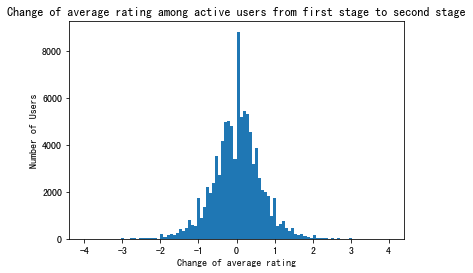

In [95]:
plt.hist(user_score_diff.values(), 100);
plt.title("Change of average rating among active users from first stage to second stage")
plt.xlabel('Change of average rating')
plt.ylabel('Number of Users')

plt.savefig('results/hist_active_users.png')

In [68]:
# np.mean(np.array(list(user_score_diff.values())))

In [61]:
"Ratings in first stage is on average %.4f higher than that in second stage for all active users"%np.nanmean(np.array(list(user_score_diff.values())))

'Ratings in first stage is on average 0.0105 higher than that in second stage for all active users'

Combing with results from the histgram and change in average rating, we can know that in the group of active users, users with more comments are more negative. 

In [81]:
avg_num_comments_be_pos = 0
be_pos_count = 0
avg_num_comments_be_neg = 0
be_neg_count = 0
for user, score_diff in tqdm(user_score_diff.items()):
    # become negative
    if score_diff > 0:
        avg_num_comments_be_neg += user_dic[user]
        be_neg_count += 1
    # become positive
    if score_diff < 0:
        avg_num_comments_be_pos += user_dic[user]
        be_pos_count += 1
avg_num_comments_be_pos /= be_pos_count
avg_num_comments_be_neg /= be_neg_count

print("%i users tend to give lower ratings in the second stage"%be_neg_count)
print("%i users tend to give higher ratings in the second stage"%be_pos_count)
print("Among acitve users:")
print("Users tend to give lower ratings in the second stage have %.3f comments in average;"%avg_num_comments_be_neg)
print("Users tend to give higher ratings in the second stage have %.3f comments in average."%avg_num_comments_be_pos)

100%|████████████████████████████████| 95791/95791 [00:00<00:00, 1191593.04it/s]

46595 users tend to give lower ratings in the second stage
43788 users tend to give higher ratings in the second stage
Among acitve users:
Users tend to give lower ratings in the second stage have 42.856 comments in average;
Users tend to give higher ratings in the second stage have 30.626 comments in average.


##### you can regresss, avg rating and the number of comments!

In [96]:
user_score_diff

{'4d69f002306f819034976e3818a84908': 0.2843785725951329,
 '6c0f657ba0d8600e45f323e65a8de516': 0.06666666666666687,
 '17739145eb2c9f82586e72225de046a3': -0.033333333333333215,
 '1d9b086e351695cf6e524d7fef051a13': 1.416666666666667,
 '4c71e26157aabe84bdff1a4548c9d696': 0.8000000000000003,
 '88ade831007b8f94deb739d335f4a5d0': -0.04476950354609954,
 '6e8a7940a8a008cefa3b34dedeeaa5d6': 0.13580246913580263,
 '730ba737fef28a9810633dafee3e97b7': -0.1428571428571428,
 '39646ac31fc345137f383a6da6cd4f4e': -0.5362318840579707,
 '3c3161241302d387cbb5e257212ad16f': 0.4411764705882355,
 'a2deef4389af41cc62db8ad5d2fa2a45': 0.052567112381341374,
 '016170bd2f1019c04addbd8837c4af13': -0.011579818031431266,
 'af96acbcd3322965da3f74d40339cb3b': -0.0802890405459653,
 'eab6ace6ea7d116159c174dea1ad47b6': -1.5294117647058822,
 '3dc9d11ca04a0438dbd226b489d75b47': 0.5,
 '757d8dd209f859e9b195e033079cc718': -0.5714285714285716,
 'fc6708861e8f3e4158dd55db4f8c3e1e': -0.8193548387096774,
 '53bc3449327ba67d4302677476a

In [97]:
user_dic

{'4d69f002306f819034976e3818a84908': 320,
 '6c0f657ba0d8600e45f323e65a8de516': 30,
 '17739145eb2c9f82586e72225de046a3': 62,
 '1d9b086e351695cf6e524d7fef051a13': 7,
 '037bf77a6b61d5e125ffa025d77bb0ad': 1,
 '4d13992cd8f8a807516eef1d6b849695': 1,
 'cc1a3f86b1193f9bb89179ce786a907c': 2,
 '4c71e26157aabe84bdff1a4548c9d696': 20,
 '88ade831007b8f94deb739d335f4a5d0': 95,
 '6e8a7940a8a008cefa3b34dedeeaa5d6': 162,
 '730ba737fef28a9810633dafee3e97b7': 14,
 '16357c4a27c3104965581293a870b04f': 1,
 'f6842a34cfb5abf13ddff80eb0d38ea7': 5,
 '39646ac31fc345137f383a6da6cd4f4e': 45,
 '3c3161241302d387cbb5e257212ad16f': 33,
 'a2deef4389af41cc62db8ad5d2fa2a45': 210,
 '016170bd2f1019c04addbd8837c4af13': 125,
 'af96acbcd3322965da3f74d40339cb3b': 107,
 'c203a2d339f2fa0f269ad2ad9617989f': 1,
 'eab6ace6ea7d116159c174dea1ad47b6': 38,
 '8069c5d14a4d6be6ad9e20be3f6597c4': 4,
 '322e6cb4f47534c23b607d817de1bdd9': 3,
 '3dc9d11ca04a0438dbd226b489d75b47': 8,
 'b6552e5f05d14615477b61ab6705d84f': 1,
 '757d8dd209f859e9b195

In [98]:
users = []
num_comments = []
score_change = []

for user, score in user_score_diff.items():
    users.append(user)
    num_comments.append(user_dic[user])
    score_change.append(score)
    
dic_for_reg = {'user_md5':users,
               'number_of_comments':num_comments,
               'rating_change':score_change}

In [100]:
df_user_change = pd.DataFrame(dic_for_reg)

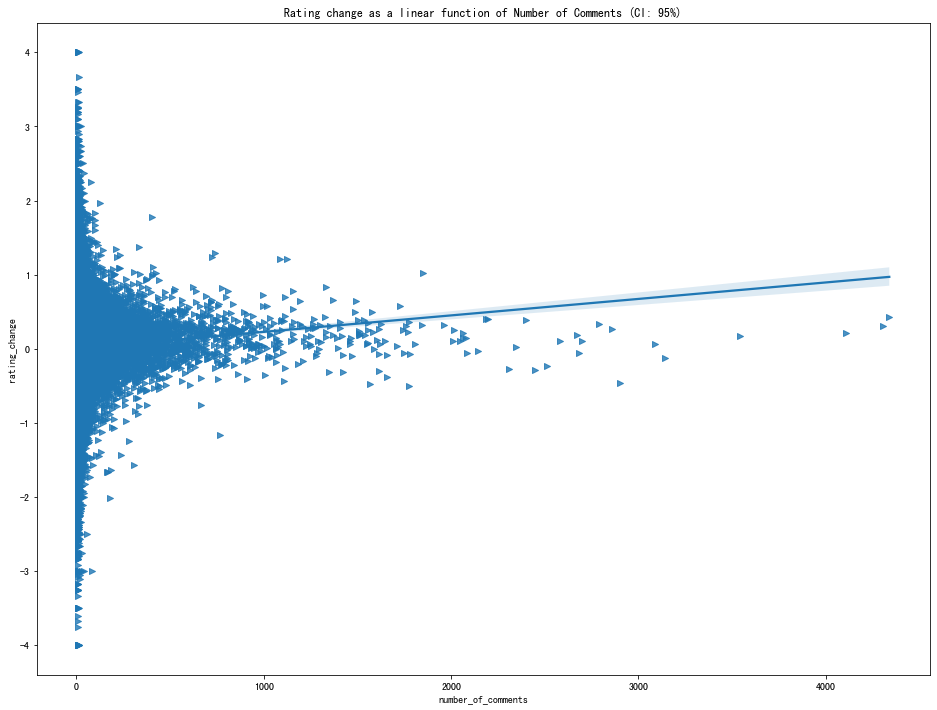

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.regplot(x='number_of_comments', y='rating_change', 
            data=df_user_change,
            ci=95,
            robust=True,
            marker=">").set_title("Rating change as a linear function of Number of Comments (CI: 95%)")
plt.savefig('results/regression_of_rating_change.png')

In [48]:
user_mask =(comments_user['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])) & (comments_user['active_state'] == 'active')

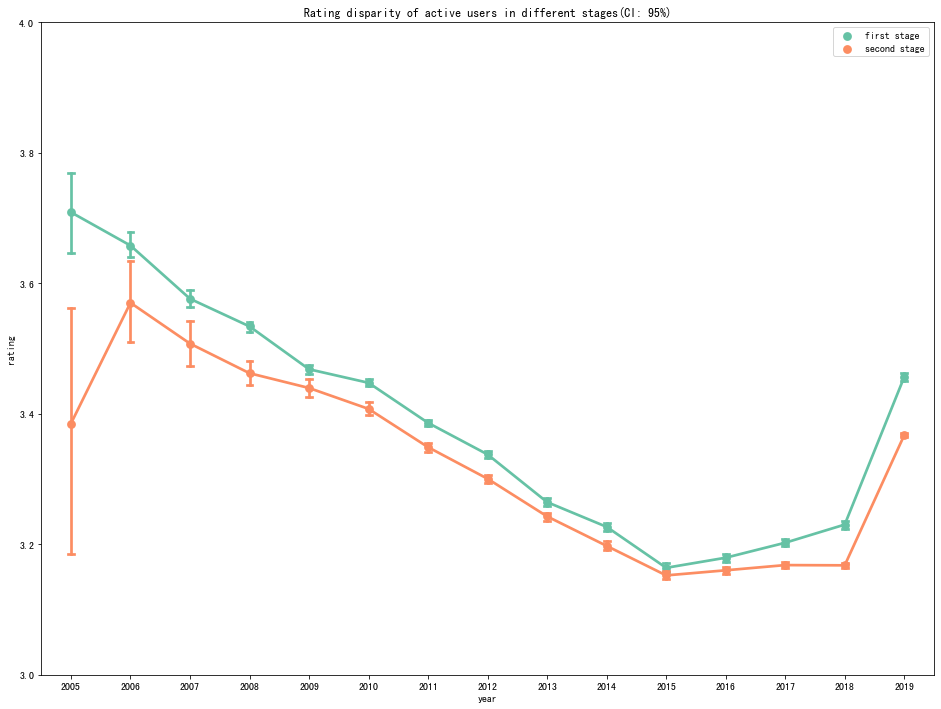

In [49]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.pointplot(x="year",y="rating",
            data=comments_user[user_mask],
            ci=95,
            hue="stage",
            hue_order=['first stage', 'second stage'],
            capsize=.1,
            palette="Set2").set_title("Rating disparity of active users in different stages(CI: 95%)")
ax.set_yticks([3.0, 3.2, 3.4, 3.6, 3.8, 4.0]);
plt.ylim([3, 4])
plt.legend(loc = 'upper right');
plt.savefig('results/user_difference_stage_change_2005_2019.png')

Though the difference is not significant, but we did find the pattern that active users tend to give more negative comments in the second stage than in the first stage. 

Under the hood of average results may hide intersing subgroup patterns. So let's visualize the rating distribution in first stage and second stage. 

In [50]:
fisrt_stage_mask = (comments_user['active_state'] == 'active') & (comments_user['stage'] == 'first stage')
second_stage_mask = (comments_user['active_state'] == 'active') & (comments_user['stage'] == 'second stage')

In [51]:
comments_user_count_first = comments_user[fisrt_stage_mask]['content'].groupby(comments_user[fisrt_stage_mask].index.year).count().tolist()                     
dic_user_first, _ = get_rating_by_year(comments_user[fisrt_stage_mask], comments_user_count_first)
df_user_first = pd.DataFrame(dic_user_first, index = ['rating=1.0','rating=2.0', 'rating=3.0', 'rating=4.0', 'rating=5.0', 'rating=NaN',
                               'portion_1.0','portion_2.0', 'portion_3.0', 'portion_4.0', 'portion_5.0', 'portion_NaN',
                               'rating_mean', 'rating_std', 'user_num', 'user_avg_comments', 'user_std_comments'])
x = df_user_first.columns

1201it [00:00, 419465.33it/s]
10932it [00:00, 453084.30it/s]
27269it [00:00, 440055.85it/s]
69231it [00:00, 475784.21it/s]
100657it [00:00, 551929.87it/s]
172760it [00:00, 496181.42it/s]
210928it [00:00, 461297.97it/s]
173056it [00:00, 475331.95it/s]
136298it [00:00, 426192.36it/s]
116685it [00:00, 397133.93it/s]
114697it [00:00, 394662.04it/s]
129266it [00:00, 383605.08it/s]
157842it [00:00, 424536.12it/s]
151938it [00:00, 461644.01it/s]
126933it [00:00, 498466.47it/s]


In [52]:
comments_user_count_second = comments_user[second_stage_mask]['content'].groupby(comments_user[second_stage_mask].index.year).count().tolist()                     
dic_user_second, _ = get_rating_by_year(comments_user[second_stage_mask], comments_user_count_second)
df_user_second = pd.DataFrame(dic_user_second, index = ['rating=1.0','rating=2.0', 'rating=3.0', 'rating=4.0', 'rating=5.0', 'rating=NaN',
                               'portion_1.0','portion_2.0', 'portion_3.0', 'portion_4.0', 'portion_5.0', 'portion_NaN',
                               'rating_mean', 'rating_std', 'user_num', 'user_avg_comments', 'user_std_comments'])

163it [00:00, 412595.99it/s]
996it [00:00, 453783.05it/s]
3428it [00:00, 485680.11it/s]
12011it [00:00, 475567.21it/s]
21790it [00:00, 500708.84it/s]
44446it [00:00, 343347.86it/s]
88069it [00:00, 441831.78it/s]
132297it [00:00, 398124.11it/s]
120006it [00:00, 444954.69it/s]
105431it [00:00, 421772.67it/s]
104776it [00:00, 451647.39it/s]
146645it [00:00, 523797.76it/s]
203258it [00:00, 460857.66it/s]
283754it [00:00, 503546.40it/s]
484253it [00:01, 419560.97it/s]


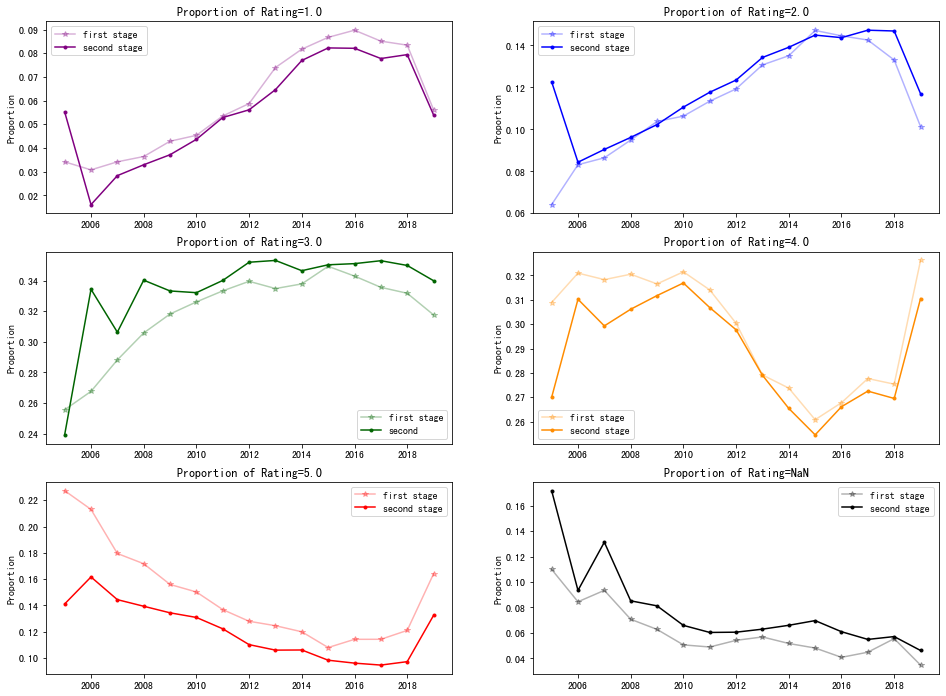

In [69]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches(16, 12)

axes[0][0].plot(x, df_user_first.loc['portion_1.0', :],
        color='purple', label='first stage', marker='*', alpha=0.3)
axes[0][0].plot(x, df_user_second.loc['portion_1.0', :],
        color='purple', label='second stage', marker='.')
axes[0][0].set_title("Proportion of Rating=1.0")
axes[0][0].set_ylabel('Proportion')
axes[0][0].legend()


axes[0][1].plot(x, df_user_first.loc['portion_2.0', :],
        color='blue', label='first stage', marker='*', alpha=0.3)
axes[0][1].plot(x, df_user_second.loc['portion_2.0', :],
        color='blue', label='second stage', marker='.')
axes[0][1].set_title("Proportion of Rating=2.0")
axes[0][1].set_ylabel('Proportion')
axes[0][1].legend()

axes[1][0].plot(x, df_user_first.loc['portion_3.0', :],
        color='darkgreen', label='first stage', marker='*', alpha=0.3)
axes[1][0].plot(x, df_user_second.loc['portion_3.0', :],
        color='darkgreen', label='second', marker='.')
axes[1][0].set_title("Proportion of Rating=3.0")
axes[1][0].set_ylabel('Proportion')
axes[1][0].legend()


axes[1][1].plot(x, df_user_first.loc['portion_4.0', :],
        color='darkorange', label='first stage', marker='*', alpha=0.3)
axes[1][1].plot(x, df_user_second.loc['portion_4.0', :],
        color='darkorange', label='second stage', marker='.')
axes[1][1].set_title("Proportion of Rating=4.0")
axes[1][1].set_ylabel('Proportion')
axes[1][1].legend()

axes[2][0].plot(x, df_user_first.loc['portion_5.0', :],
        color='red', label='first stage', marker='*', alpha=0.3)
axes[2][0].plot(x, df_user_second.loc['portion_5.0', :],
        color='red', label='second stage', marker='.')
axes[2][0].set_title("Proportion of Rating=5.0")
axes[2][0].set_ylabel('Proportion')
axes[2][0].legend()


axes[2][1].plot(x, df_user_first.loc['portion_NaN', :],
        color='k', label='first stage', marker='*', alpha=0.3)
axes[2][1].plot(x, df_user_second.loc['portion_NaN', :],
        color='k', label='second stage', marker='.')
axes[2][1].set_title("Proportion of Rating=NaN")
axes[2][1].set_ylabel('Proportion')
axes[2][1].legend()

plt.savefig('results/rating_proprotion_between_stages.png')

We use dark colors to denote ratings in first stage and light colors to denote ratings in second stage. We can find that users in their first stage would give higher proprotion of high ratings but lower proportion of medim ratings and NaN ratings, which further confirm our hypothesis. As users spend more time in this community, they tend give less positive ratings. (Plan: And using BERT we'd show that though a rating=3.0 sometimes could be positive, but it's more likely to be negative. So users were actually shifting to negative side)

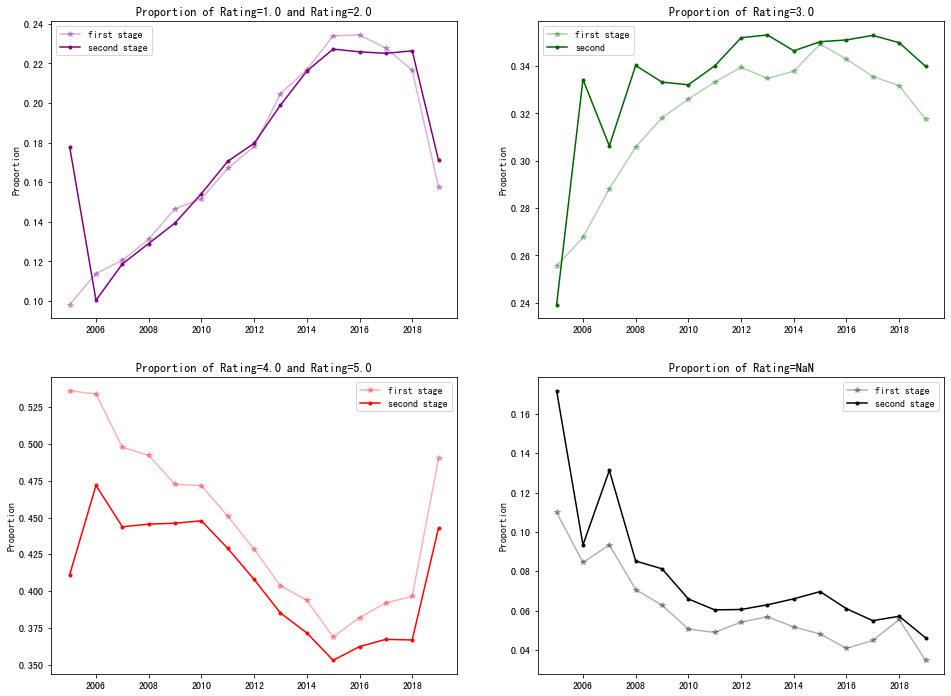

In [70]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16, 12)

axes[0][0].plot(x, df_user_first.loc['portion_1.0', :] + df_user_first.loc['portion_2.0', :],
        color='purple', label='first stage', marker='*', alpha=0.3)
axes[0][0].plot(x, df_user_second.loc['portion_1.0', :] + df_user_second.loc['portion_2.0', :],
        color='purple', label='second stage', marker='.')
axes[0][0].set_title("Proportion of Rating=1.0 and Rating=2.0")
axes[0][0].set_ylabel('Proportion')
axes[0][0].legend()


axes[0][1].plot(x, df_user_first.loc['portion_3.0', :],
        color='darkgreen', label='first stage', marker='*', alpha=0.3)
axes[0][1].plot(x, df_user_second.loc['portion_3.0', :],
        color='darkgreen', label='second', marker='.')
axes[0][1].set_title("Proportion of Rating=3.0")
axes[0][1].set_ylabel('Proportion')
axes[0][1].legend()


axes[1][0].plot(x, df_user_first.loc['portion_4.0', :] + df_user_first.loc['portion_5.0', :],
        color='red', label='first stage', marker='*', alpha=0.3)
axes[1][0].plot(x, df_user_second.loc['portion_4.0', :] + df_user_second.loc['portion_5.0', :],
        color='red', label='second stage', marker='.')
axes[1][0].set_title("Proportion of Rating=4.0 and Rating=5.0")
axes[1][0].set_ylabel('Proportion')
axes[1][0].legend()


axes[1][1].plot(x, df_user_first.loc['portion_NaN', :],
        color='k', label='first stage', marker='*', alpha=0.3)
axes[1][1].plot(x, df_user_second.loc['portion_NaN', :],
        color='k', label='second stage', marker='.')
axes[1][1].set_title("Proportion of Rating=NaN")
axes[1][1].set_ylabel('Proportion')
axes[1][1].legend()

plt.savefig('results/rating_proprotion_between_stages_aggregate.png')

In [71]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(x, df_user_first.loc['portion_1.0', :] + df_user_first.loc['portion_2.0', :],
#         color='blue', label='negative(active)')
# ax.plot(x, df_user_first.loc['portion_3.0', :],
#         color='darkgreen', label='rating=3.0(active)')
# ax.plot(x, df_user_first.loc['portion_4.0', :] + df_user_first.loc['portion_5.0', :],
#         color='red', label='positive(active)')
# ax.plot(x, df_user_first.loc['portion_NaN', :],
#         color='k', label='rating=NaN(active)')

# ax.plot(x, df_user_second.loc['portion_1.0', :] + df_user_second.loc['portion_2.0', :],
#         color='dodgerblue', label='negative(less active)')
# ax.plot(x, df_user_second.loc['portion_3.0', :],
#         color='limegreen', label='rating=3.0(less active)')
# ax.plot(x, df_user_second.loc['portion_4.0', :] + df_user_second.loc['portion_5.0', :],
#         color='lightcoral', label='rating=4.0(less active)')
# ax.plot(x, df_user_second.loc['portion_NaN', :],
#         color='gray', label='rating=NaN(less active)')

# plt.title("Aggregated Rating Distribution: first stage vs. second stage(2005-2019)")
# plt.ylabel('Proportion')
# plt.ylim([0, 0.7])
# plt.legend(loc = 'upper right')

### Comparision between popular and less popular movies

Note that we only have 220 comments for popular movies, there's a risk of being confounded by ranking algorithms, so  we need to check that if there's a systematic difference between popular movies and less popular movies in terms of distribution of raitng of movie comments.

Some movies have more than 220 comments, because the researchers scraped the webstie many times(durting the scraping interval the list of viewable comments for unlogged users are changed) and merged those comments 

In [72]:
movie_dic = {}
for idx, row in tqdm(comments.iterrows()):
    if row['movie_id'] not in movie_dic:
        movie_dic[row['movie_id']] = 0
    movie_dic[row['movie_id']] += 1

4428464it [03:42, 19864.99it/s]


In [73]:
Counter(movie_dic.values())

Counter({317: 63,
         219: 338,
         158: 75,
         279: 65,
         196: 51,
         280: 164,
         220: 1999,
         200: 437,
         240: 293,
         120: 670,
         58: 170,
         151: 46,
         203: 46,
         180: 347,
         320: 368,
         299: 57,
         71: 126,
         160: 419,
         244: 22,
         86: 101,
         154: 74,
         185: 46,
         302: 19,
         297: 32,
         184: 54,
         130: 82,
         70: 128,
         140: 489,
         119: 184,
         168: 50,
         216: 62,
         166: 48,
         67: 128,
         65: 142,
         268: 19,
         239: 121,
         316: 54,
         40: 660,
         12: 1017,
         11: 1144,
         258: 72,
         263: 22,
         217: 66,
         272: 29,
         314: 42,
         152: 78,
         248: 25,
         85: 119,
         4: 3397,
         122: 106,
         255: 38,
         309: 28,
         38: 261,
         208: 39,
         118

In [74]:
len(movie_dic.keys())

68887

In [75]:
popular_movies = 0
comments_from_popular = 0
for v in tqdm(movie_dic.values()):
    if v >=220:
        popular_movies +=1
        comments_from_popular += v

"%i popular movies"%popular_movies, '%i comments from popular movies'%comments_from_popular

100%|████████████████████████████████| 68887/68887 [00:00<00:00, 2770795.56it/s]


('6491 popular movies', '1662569 comments from popular movies')

In [76]:
movie_popularity = []
for idx, row in tqdm(comments.iterrows()):
    if movie_dic[row['movie_id']] >= 220:
        movie_popularity.append('popular')
    else:
        movie_popularity.append('less popular')

4428464it [03:12, 22972.04it/s]


In [77]:
comments_movie = pd.concat([comments_user, 
                            pd.DataFrame({'popularity':movie_popularity},
                                         index=comments.index)], axis=1)

In [78]:
comments_movie

,comment_id,movie_id,user_md5,content,votes,rating,year,active_state,stage,popularity
comment_time,,,,,,,,,,
2005-06-12 02:22:07,3942,1291856,4d69f002306f819034976e3818a84908,http://www.bighead.cn/?p=15,19,4.0,2005,active,first stage,popular
2005-06-12 02:22:07,3944,1291581,4d69f002306f819034976e3818a84908,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,6,4.0,2005,active,first stage,less popular
2005-06-12 02:22:07,3943,1291832,4d69f002306f819034976e3818a84908,我爱特拉沃塔的舞。,1590,5.0,2005,active,first stage,less popular
2005-06-12 02:22:07,3945,1291582,4d69f002306f819034976e3818a84908,20061118跟小白重看了一遍。,0,5.0,2005,active,first stage,popular
2005-06-12 02:22:09,4104,1292210,6c0f657ba0d8600e45f323e65a8de516,重看依然很喜欢很喜欢,0,4.0,2005,active,first stage,less popular
...,...,...,...,...,...,...,...,...,...,...
2019-09-07 15:57:07,1942942072,27063867,79a5045cc0cce798c046b84a56578d6d,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,0,2.0,2019,active,second stage,less popular
2019-09-07 15:58:03,1942943180,27063867,fed2dab59d6797ad2c3838091a1288b8,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,0,2.0,2019,active,second stage,less popular
2019-09-07 15:58:51,1942944164,27063867,32b9368b0d6edac78eed1049434f765b,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,0,2.0,2019,active,second stage,less popular


In [80]:
comments_movie_plt = comments_movie.reset_index()

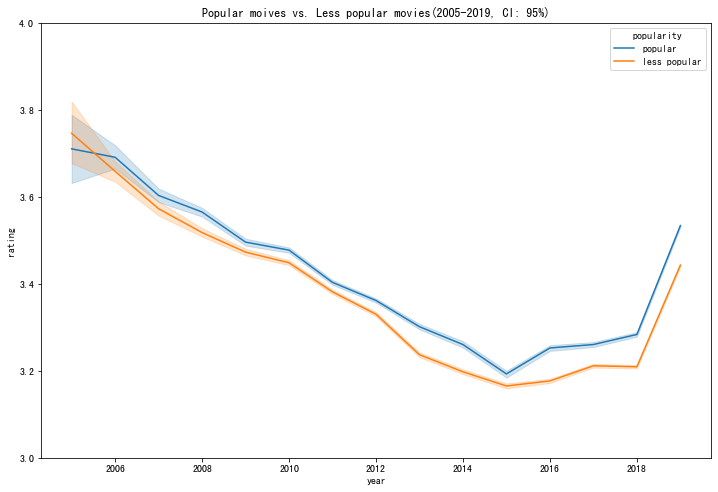

In [81]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(x="year",y="rating",
             data=comments_movie_plt[comments_movie_plt['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])],
             hue="popularity",
             hue_order=['popular', 'less popular'],
             ci=95).set_title("Popular moives vs. Less popular movies(2005-2019, CI: 95%)")
ax.set_yticks([3.0, 3.2, 3.4, 3.6, 3.8, 4.0]);
plt.savefig('results/mean_rating_comparison_2005_2019.png')

Below: the abnormal maybe caused that active users tend to watch those popular movies at first and give some popular movies. or the biases from algorithm. or the algorithm tend to select less commments from those years. Shawshank example.

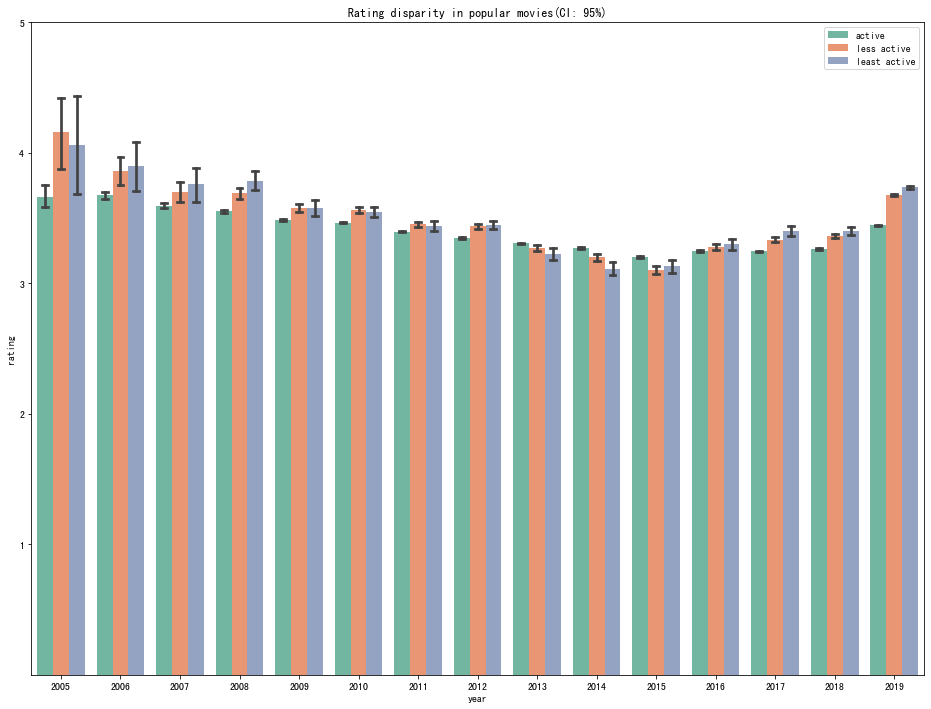

In [168]:
rating_mask =(comments_movie['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])) 
pop_mask_1 = (comments_movie['popularity'] == 'popular')
pop_mask_2 = (comments_movie['popularity'] == 'less popular')

fig, axes = plt.subplots()
fig.set_size_inches(16, 12)

sns.barplot(x="year",y="rating",
            data=comments_movie[rating_mask & pop_mask_1],
            ci=95,
            hue="active_state",
            hue_order=['active', 'less active', 'least active'],
            capsize=.1,
            palette="Set2").set_title("Rating disparity in popular movies(CI: 95%)")
axes.set_yticks([1.0, 2.0, 3.0, 4.0, 5.0]);
plt.legend(loc = 'upper right');

For less popular movies, active users tend to be more negative. For popular movies, active users tend to be more negative in most years.

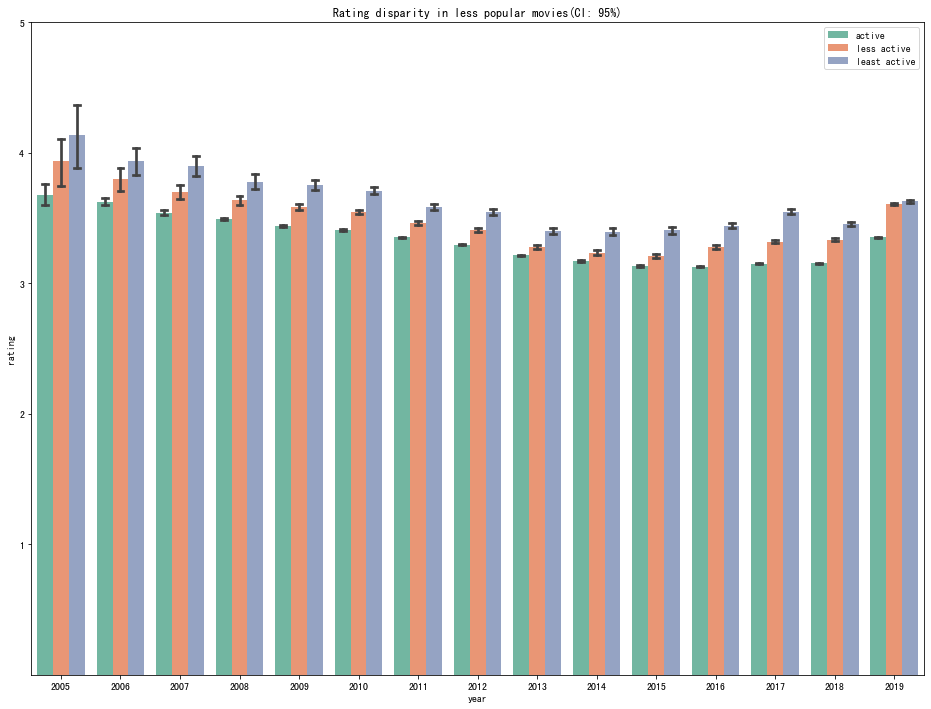

In [170]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.barplot(x="year",y="rating",
            data=comments_movie[rating_mask & pop_mask_2],
            ci=95,
            hue="active_state",
            hue_order=['active', 'less active', 'least active'],
            capsize=.1,
            palette="Set2").set_title("Rating disparity in less popular movies(CI: 95%)")
ax.set_yticks([1.0, 2.0, 3.0, 4.0, 5.0]);
plt.legend(loc = 'upper right');